In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
inp0 = pd.read_excel('Main.xlsx')

In [14]:
inp1 = inp0.drop(columns=['Area Name'])

In [43]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

data_scaled = scaler.fit_transform(inp1)
data_scaled = pd.DataFrame(data_scaled)
data_scaled.columns = inp1.columns
data_scaled.head()

,Illiterate,Graduate & above,Total - Population,Percentage Illiterate,Percentage Graduate & above
0,-0.384782,-0.500111,-0.503383,1.203902,-0.250185
1,-0.600888,-0.585328,-0.632950,-1.067532,0.256526
2,-0.249850,-0.069368,-0.156405,-0.438373,0.029016
3,-0.671456,-0.713421,-0.765541,-0.616716,3.154645
4,-0.514483,-0.398717,-0.559417,-0.171623,1.053547


In [44]:
data_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Illiterate                   35 non-null     float64
 1   Graduate & above             35 non-null     float64
 2   Total - Population           35 non-null     float64
 3   Percentage Illiterate        35 non-null     float64
 4   Percentage Graduate & above  35 non-null     float64
dtypes: float64(5)
memory usage: 1.5 KB


In [61]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

def try_kmeans(input_data):
    # elbow curve/SSD
    print(f'doing kmeans for {input_data.columns}')
    ssd = []
    for cluster in [2,3,4,5,6,7,8]:
        kmeans = KMeans(n_clusters=cluster, max_iter=50, random_state=100)
        kmeans.fit(input_data)

        ssd.append(kmeans.inertia_)

    plt.plot(ssd)
    plt.show()

    print(f'ssd : {ssd}')

    # silhouette_score
    for cluster in [2,3,4,5,6,7,8]:
        kmeans = KMeans(n_clusters=cluster, max_iter=50)
        kmeans.fit(input_data)

        cluster_labels = kmeans.labels_

        score = silhouette_score(input_data, cluster_labels)
        print(f'For n_clusters = {cluster}, the silhouette score is {score}')


from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

def try_hierarchical_clustering(input_data, linkage_method, num_cluster):
    print(f'doing heirarchical clustering for {input_data.columns}')
    mergings = linkage(input_data, method=linkage_method, metric='euclidean')
    cluster_labels = cut_tree(mergings, n_clusters=num_cluster).reshape(-1,)
    input_data['cluster'] = cluster_labels
    dendrogram(mergings)
    plt.title(f'{linkage_method} clusters = {num_cluster}')
    plt.show()


In [46]:
data_scaled.columns

Index(['Illiterate', 'Graduate & above', 'Total - Population',
       'Percentage Illiterate', 'Percentage Graduate & above'],
      dtype='object')

doing heirarchical clustering for Index(['Illiterate', 'Graduate & above'], dtype='object')


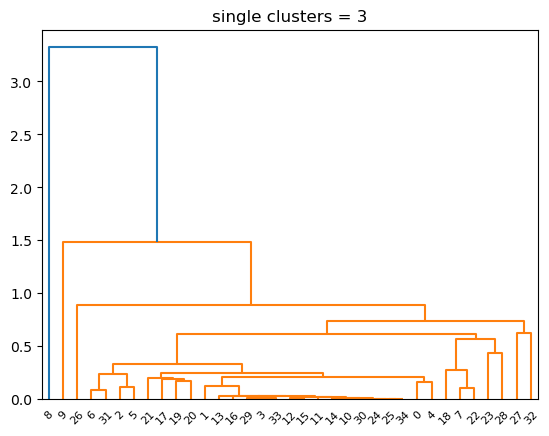

doing heirarchical clustering for Index(['Illiterate', 'Graduate & above'], dtype='object')


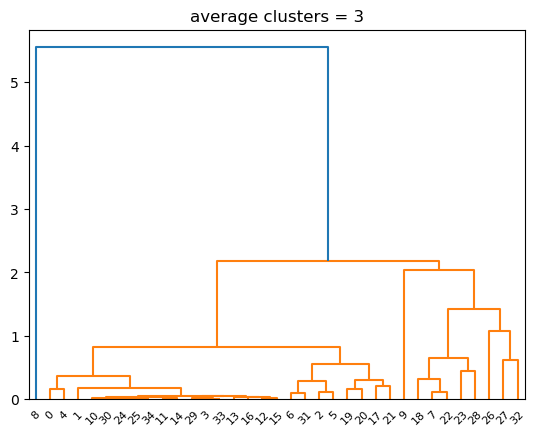

doing heirarchical clustering for Index(['Illiterate', 'Graduate & above'], dtype='object')


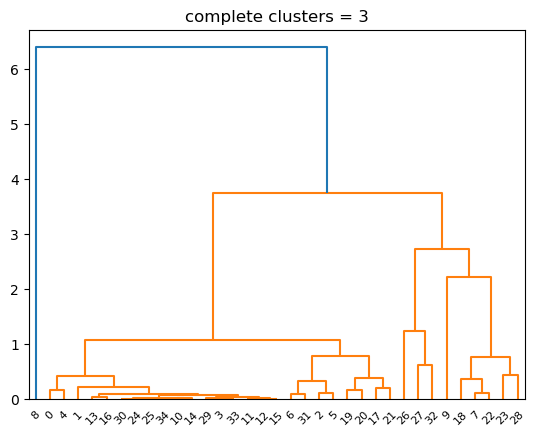

In [64]:
data = data_scaled[[
    'Illiterate',
    'Graduate & above'
]]
try_hierarchical_clustering(data.copy(), 'single', 3)
try_hierarchical_clustering(data.copy(),'average', 3)
try_hierarchical_clustering(data.copy(),'complete', 3)

doing heirarchical clustering for Index(['Illiterate', 'Graduate & above'], dtype='object')


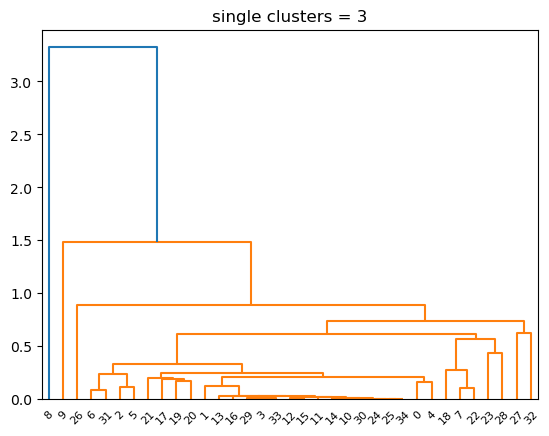

doing heirarchical clustering for Index(['Illiterate', 'Graduate & above'], dtype='object')


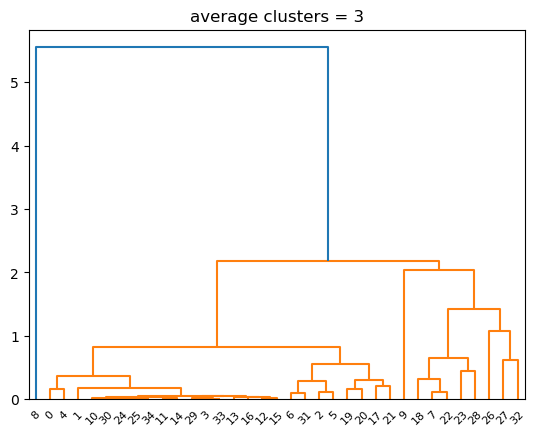

doing heirarchical clustering for Index(['Illiterate', 'Graduate & above'], dtype='object')


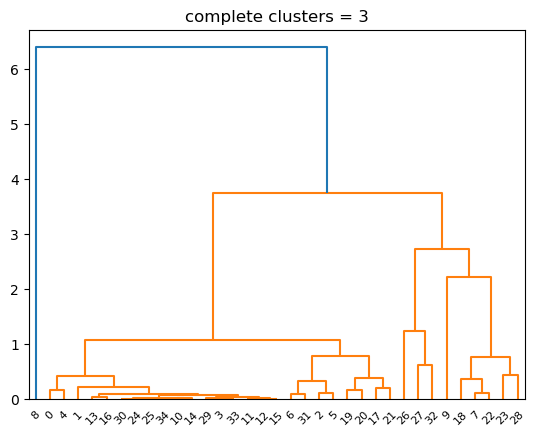

In [65]:
data = data_scaled[[
    'Illiterate',
    'Graduate & above'
]]
try_hierarchical_clustering(data.copy(), 'single', 3)
try_hierarchical_clustering(data.copy(),'average', 3)
try_hierarchical_clustering(data.copy(),'complete', 3)

In [243]:
data_scaled.head()

,Illiterate,Graduate & above,Total - Population,Percentage Illiterate,Percentage Graduate & above
0,-0.384782,-0.500111,-0.503383,1.203902,-0.250185
1,-0.600888,-0.585328,-0.632950,-1.067532,0.256526
2,-0.249850,-0.069368,-0.156405,-0.438373,0.029016
3,-0.671456,-0.713421,-0.765541,-0.616716,3.154645
4,-0.514483,-0.398717,-0.559417,-0.171623,1.053547


doing kmeans for MultiIndex([(        'Illiterate',),
            ('Total - Population',)],
           )


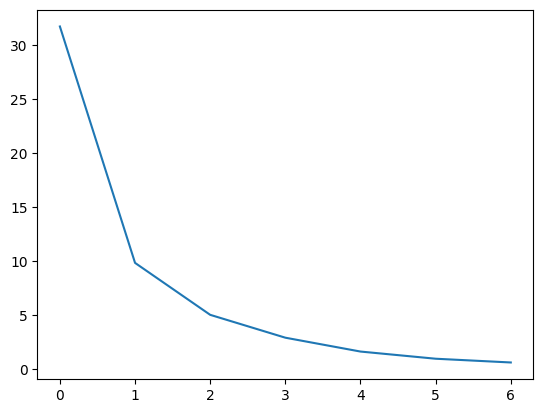

ssd : [31.70926390493588, 9.805589376884857, 4.992535312209743, 2.8740734691945935, 1.5903511043652483, 0.9253962948794741, 0.5779995200026016]
For n_clusters = 2, the silhouette score is 0.6743882416452761
For n_clusters = 3, the silhouette score is 0.6811318429052298
For n_clusters = 4, the silhouette score is 0.6556463050328007
For n_clusters = 5, the silhouette score is 0.615239523779474
For n_clusters = 6, the silhouette score is 0.6088905987980683
For n_clusters = 7, the silhouette score is 0.63795495389514
For n_clusters = 8, the silhouette score is 0.6233709423768333


In [244]:
data = data_scaled[[
    'Illiterate',
    'Total - Population'
]]
try_kmeans(data)

In [245]:
data_scaled.head()

,Illiterate,Graduate & above,Total - Population,Percentage Illiterate,Percentage Graduate & above
0,-0.384782,-0.500111,-0.503383,1.203902,-0.250185
1,-0.600888,-0.585328,-0.632950,-1.067532,0.256526
2,-0.249850,-0.069368,-0.156405,-0.438373,0.029016
3,-0.671456,-0.713421,-0.765541,-0.616716,3.154645
4,-0.514483,-0.398717,-0.559417,-0.171623,1.053547


doing kmeans for MultiIndex([(           'Illiterate',),
            ('Percentage Illiterate',)],
           )


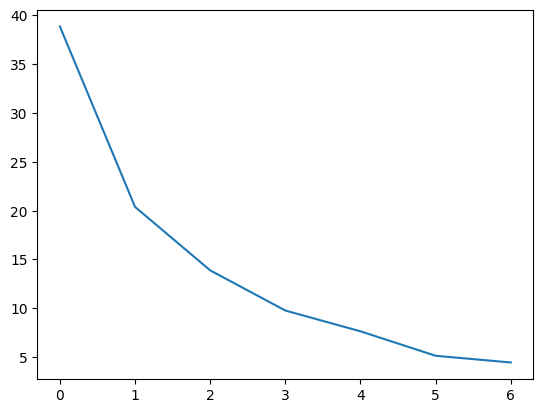

ssd : [38.86533279406174, 20.38650579959077, 13.888697151134563, 9.770540431654187, 7.64478630915871, 5.1389929783446515, 4.453283292365523]
For n_clusters = 2, the silhouette score is 0.64674078845413
For n_clusters = 3, the silhouette score is 0.4161558219499128
For n_clusters = 4, the silhouette score is 0.4010195018088514
For n_clusters = 5, the silhouette score is 0.42032068674871653
For n_clusters = 6, the silhouette score is 0.44129289805358485
For n_clusters = 7, the silhouette score is 0.3721447213388409
For n_clusters = 8, the silhouette score is 0.3965950890769381


In [246]:
data = data_scaled[[
    'Illiterate',
    'Percentage Illiterate'
]]
try_kmeans(data)

In [247]:
data_scaled.head()

,Illiterate,Graduate & above,Total - Population,Percentage Illiterate,Percentage Graduate & above
0,-0.384782,-0.500111,-0.503383,1.203902,-0.250185
1,-0.600888,-0.585328,-0.632950,-1.067532,0.256526
2,-0.249850,-0.069368,-0.156405,-0.438373,0.029016
3,-0.671456,-0.713421,-0.765541,-0.616716,3.154645
4,-0.514483,-0.398717,-0.559417,-0.171623,1.053547


doing kmeans for MultiIndex([(                 'Illiterate',),
            ('Percentage Graduate & above',)],
           )


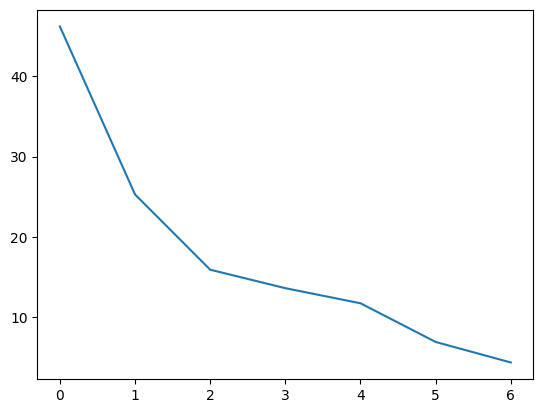

ssd : [46.20726901588206, 25.267889446792932, 15.893657004875198, 13.58799910144101, 11.706305411773823, 6.885327272921443, 4.328231368563417]
For n_clusters = 2, the silhouette score is 0.36372795157466686
For n_clusters = 3, the silhouette score is 0.5121715370477142
For n_clusters = 4, the silhouette score is 0.35740931282032157
For n_clusters = 5, the silhouette score is 0.3757723143883403
For n_clusters = 6, the silhouette score is 0.39052595752464575
For n_clusters = 7, the silhouette score is 0.3774959710205348
For n_clusters = 8, the silhouette score is 0.41410884592246067


In [248]:
data = data_scaled[[
    'Illiterate',
    'Percentage Graduate & above'
]]
try_kmeans(data)

In [249]:
data_scaled.head()

,Illiterate,Graduate & above,Total - Population,Percentage Illiterate,Percentage Graduate & above
0,-0.384782,-0.500111,-0.503383,1.203902,-0.250185
1,-0.600888,-0.585328,-0.632950,-1.067532,0.256526
2,-0.249850,-0.069368,-0.156405,-0.438373,0.029016
3,-0.671456,-0.713421,-0.765541,-0.616716,3.154645
4,-0.514483,-0.398717,-0.559417,-0.171623,1.053547


doing kmeans for MultiIndex([(  'Graduate & above',),
            ('Total - Population',)],
           )


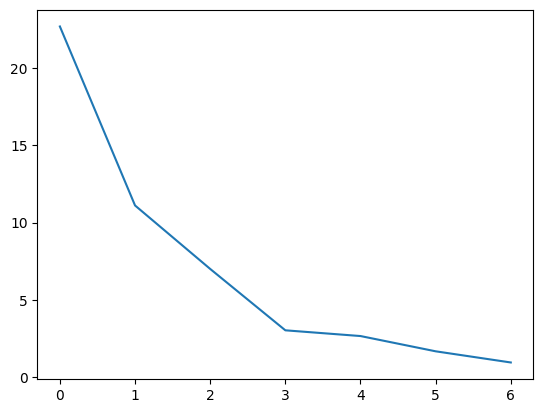

ssd : [22.706293272823473, 11.114190476411142, 7.003817048520227, 3.0285945215467835, 2.657449045593509, 1.668857208418392, 0.9456061687820184]
For n_clusters = 2, the silhouette score is 0.6707270535607529
For n_clusters = 3, the silhouette score is 0.6604298507117025
For n_clusters = 4, the silhouette score is 0.5896876860899254
For n_clusters = 5, the silhouette score is 0.6459536765250371
For n_clusters = 6, the silhouette score is 0.5914186001029581
For n_clusters = 7, the silhouette score is 0.6423589889008502
For n_clusters = 8, the silhouette score is 0.5742853873011413


In [250]:
data = data_scaled[[
    'Graduate & above',
    'Total - Population'
]]
try_kmeans(data)

In [251]:
data_scaled.head()

,Illiterate,Graduate & above,Total - Population,Percentage Illiterate,Percentage Graduate & above
0,-0.384782,-0.500111,-0.503383,1.203902,-0.250185
1,-0.600888,-0.585328,-0.632950,-1.067532,0.256526
2,-0.249850,-0.069368,-0.156405,-0.438373,0.029016
3,-0.671456,-0.713421,-0.765541,-0.616716,3.154645
4,-0.514483,-0.398717,-0.559417,-0.171623,1.053547


doing kmeans for MultiIndex([(     'Graduate & above',),
            ('Percentage Illiterate',)],
           )


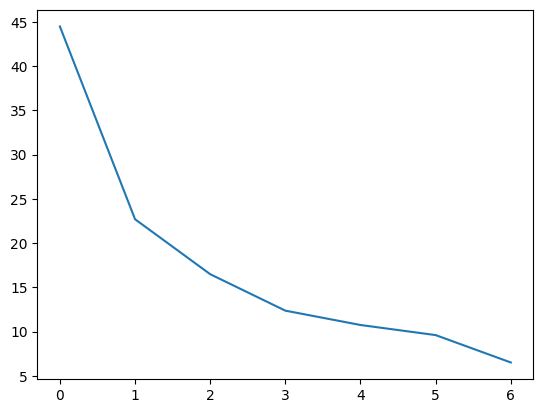

ssd : [44.48151522241957, 22.696718916708992, 16.483691063587873, 12.363569135785896, 10.74317947484025, 9.601589883931055, 6.506735665779247]
For n_clusters = 2, the silhouette score is 0.48441622088263736
For n_clusters = 3, the silhouette score is 0.4453744568709278
For n_clusters = 4, the silhouette score is 0.4000312271862467
For n_clusters = 5, the silhouette score is 0.3909272479307107
For n_clusters = 6, the silhouette score is 0.30272815768737354
For n_clusters = 7, the silhouette score is 0.3623852511158438
For n_clusters = 8, the silhouette score is 0.37628802090783015


In [252]:
data = data_scaled[[
    'Graduate & above',
    'Percentage Illiterate'
]]
try_kmeans(data)

In [253]:
data_scaled.head()

,Illiterate,Graduate & above,Total - Population,Percentage Illiterate,Percentage Graduate & above
0,-0.384782,-0.500111,-0.503383,1.203902,-0.250185
1,-0.600888,-0.585328,-0.632950,-1.067532,0.256526
2,-0.249850,-0.069368,-0.156405,-0.438373,0.029016
3,-0.671456,-0.713421,-0.765541,-0.616716,3.154645
4,-0.514483,-0.398717,-0.559417,-0.171623,1.053547


doing kmeans for MultiIndex([(           'Graduate & above',),
            ('Percentage Graduate & above',)],
           )


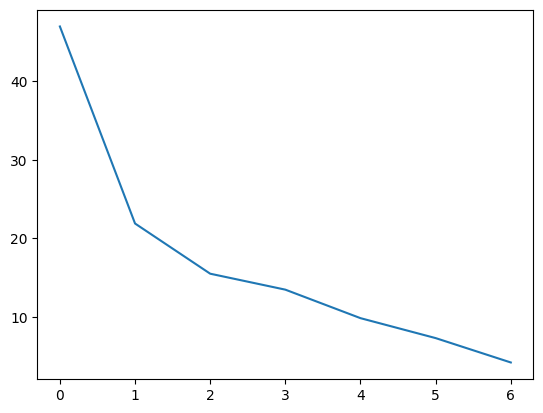

ssd : [46.947958091850026, 21.895892937961232, 15.514903772597759, 13.48592681473588, 9.861847025151501, 7.326386437873255, 4.2270956210092505]
For n_clusters = 2, the silhouette score is 0.43450816789531366
For n_clusters = 3, the silhouette score is 0.5260347529799746
For n_clusters = 4, the silhouette score is 0.39212146891983
For n_clusters = 5, the silhouette score is 0.38430737419258615
For n_clusters = 6, the silhouette score is 0.4145258164123352
For n_clusters = 7, the silhouette score is 0.408213494279397
For n_clusters = 8, the silhouette score is 0.456885622656957


In [254]:
data = data_scaled[[
    'Graduate & above',
    'Percentage Graduate & above'
]]
try_kmeans(data)

In [255]:
data_scaled.head()

,Illiterate,Graduate & above,Total - Population,Percentage Illiterate,Percentage Graduate & above
0,-0.384782,-0.500111,-0.503383,1.203902,-0.250185
1,-0.600888,-0.585328,-0.632950,-1.067532,0.256526
2,-0.249850,-0.069368,-0.156405,-0.438373,0.029016
3,-0.671456,-0.713421,-0.765541,-0.616716,3.154645
4,-0.514483,-0.398717,-0.559417,-0.171623,1.053547


doing kmeans for MultiIndex([(   'Total - Population',),
            ('Percentage Illiterate',)],
           )


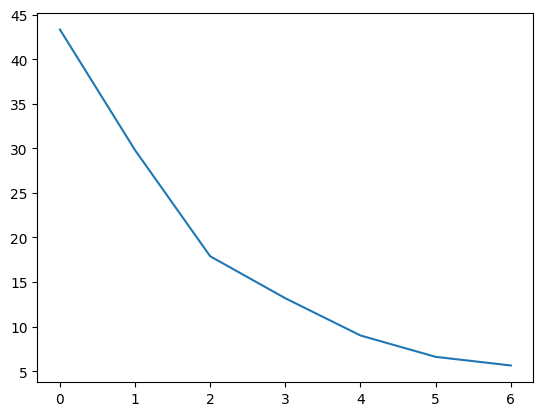

ssd : [43.32600941602786, 29.78931237031923, 17.881720186739038, 13.170044091902573, 8.993795297408177, 6.597903144195521, 5.629250904125816]
For n_clusters = 2, the silhouette score is 0.38649508475077515
For n_clusters = 3, the silhouette score is 0.3954240012526424
For n_clusters = 4, the silhouette score is 0.3839688051367439
For n_clusters = 5, the silhouette score is 0.44707109381114885
For n_clusters = 6, the silhouette score is 0.37465971385697583
For n_clusters = 7, the silhouette score is 0.39204238594907664
For n_clusters = 8, the silhouette score is 0.35829958073706797


In [256]:
data = data_scaled[[
    'Total - Population',
    'Percentage Illiterate'
]]
try_kmeans(data)

In [257]:
data_scaled.head()

,Illiterate,Graduate & above,Total - Population,Percentage Illiterate,Percentage Graduate & above
0,-0.384782,-0.500111,-0.503383,1.203902,-0.250185
1,-0.600888,-0.585328,-0.632950,-1.067532,0.256526
2,-0.249850,-0.069368,-0.156405,-0.438373,0.029016
3,-0.671456,-0.713421,-0.765541,-0.616716,3.154645
4,-0.514483,-0.398717,-0.559417,-0.171623,1.053547


doing kmeans for MultiIndex([(         'Total - Population',),
            ('Percentage Graduate & above',)],
           )


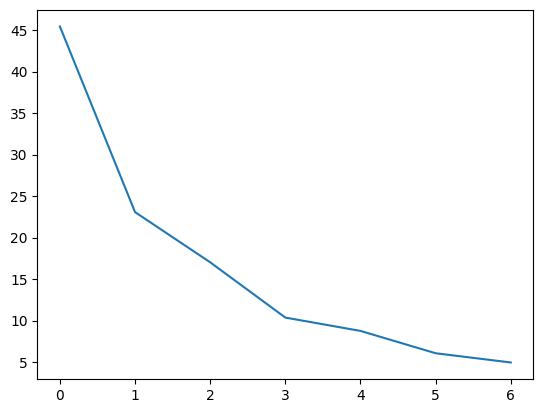

ssd : [45.44529991298284, 23.075129099615502, 17.02566783679665, 10.363499961108872, 8.756288124362724, 6.06437748892958, 4.952647092579852]
For n_clusters = 2, the silhouette score is 0.5670775114637335
For n_clusters = 3, the silhouette score is 0.4650966111416462
For n_clusters = 4, the silhouette score is 0.37889420788771805
For n_clusters = 5, the silhouette score is 0.4003222834943853
For n_clusters = 6, the silhouette score is 0.43254269391750627
For n_clusters = 7, the silhouette score is 0.41536911051109915
For n_clusters = 8, the silhouette score is 0.39809132631519906


In [258]:
data = data_scaled[[
    'Total - Population',
    'Percentage Graduate & above'
]]
try_kmeans(data)

In [259]:
data_scaled.head()

,Illiterate,Graduate & above,Total - Population,Percentage Illiterate,Percentage Graduate & above
0,-0.384782,-0.500111,-0.503383,1.203902,-0.250185
1,-0.600888,-0.585328,-0.632950,-1.067532,0.256526
2,-0.249850,-0.069368,-0.156405,-0.438373,0.029016
3,-0.671456,-0.713421,-0.765541,-0.616716,3.154645
4,-0.514483,-0.398717,-0.559417,-0.171623,1.053547


doing heirarchical clustering for Index(['Percentage Illiterate', 'Percentage Graduate & above'], dtype='object')


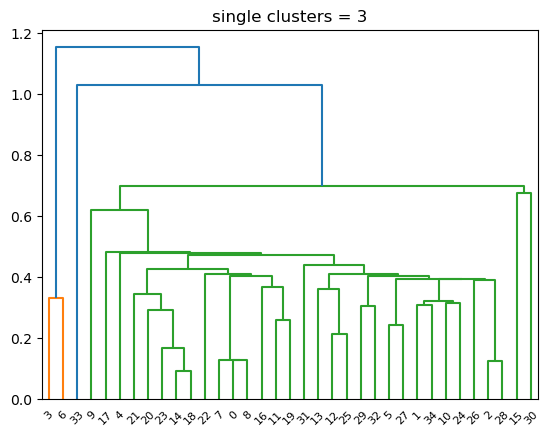

doing heirarchical clustering for Index(['Percentage Illiterate', 'Percentage Graduate & above'], dtype='object')


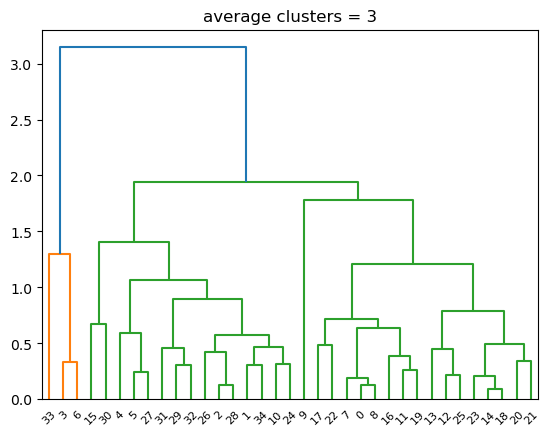

doing heirarchical clustering for Index(['Percentage Illiterate', 'Percentage Graduate & above'], dtype='object')


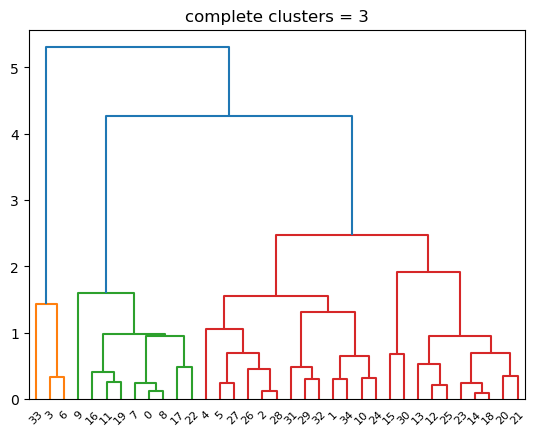

In [66]:
data = data_scaled[[
    'Percentage Illiterate',
    'Percentage Graduate & above'
]]
try_hierarchical_clustering(data.copy(), 'single', 3)
try_hierarchical_clustering(data.copy(),'average', 3)
try_hierarchical_clustering(data.copy(),'complete', 3)

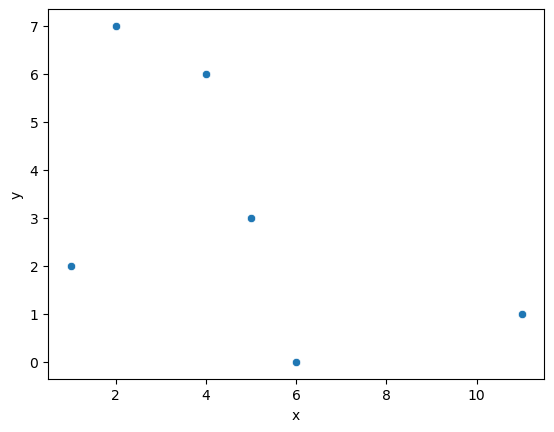

In [68]:
foo = pd.DataFrame({"x": [6,1,2,4,5,11], "y": [0,2,7,6,3,1]})
sns.scatterplot(data=foo, x='x', y='y')
plt.show()

In [69]:
foo

,x,y
0,6,0
1,1,2
2,2,7
3,4,6
4,5,3
5,11,1
